In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [3]:
# Load high-dimensional dataset
digits = load_digits()
X, y = digits.data, digits.target

# Standardize features
X = StandardScaler().fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Function to train and evaluate model
def evaluate_model(X_train, X_test, y_train, y_test, method="Original"):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{method} Accuracy: {acc:.4f}")
    return acc

In [5]:
# Original data
original_acc = evaluate_model(X_train, X_test, y_train, y_test, method="Original")

Original Accuracy: 0.9741


In [7]:
# PCA (reduce to 20 components)
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)
pca_acc = evaluate_model(X_train_pca, X_test_pca, y_train, y_test, method="PCA")

PCA Accuracy: 0.9537


In [8]:
# SelectKBest (top 20 features)
skb = SelectKBest(score_func=f_classif, k=20)
X_skb = skb.fit_transform(X, y)
X_train_skb, X_test_skb, _, _ = train_test_split(X_skb, y, test_size=0.3, random_state=42)
skb_acc = evaluate_model(X_train_skb, X_test_skb, y_train, y_test, method="SelectKBest")

SelectKBest Accuracy: 0.9556


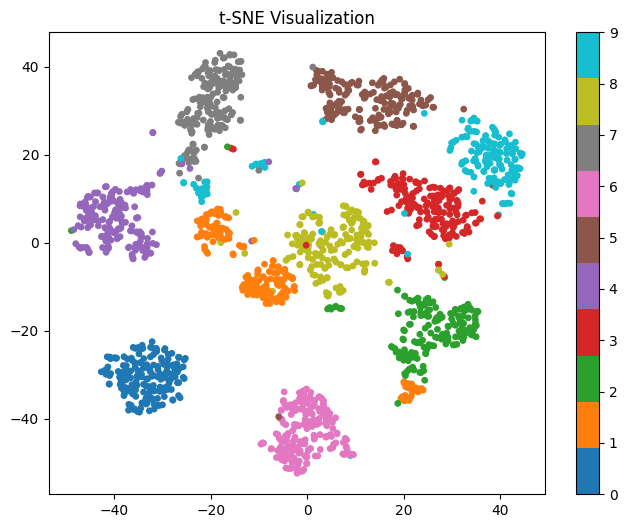

In [9]:
# t-SNE (for visualization only - not ideal for classification)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=15)
plt.title("t-SNE Visualization")
plt.colorbar()
plt.show()

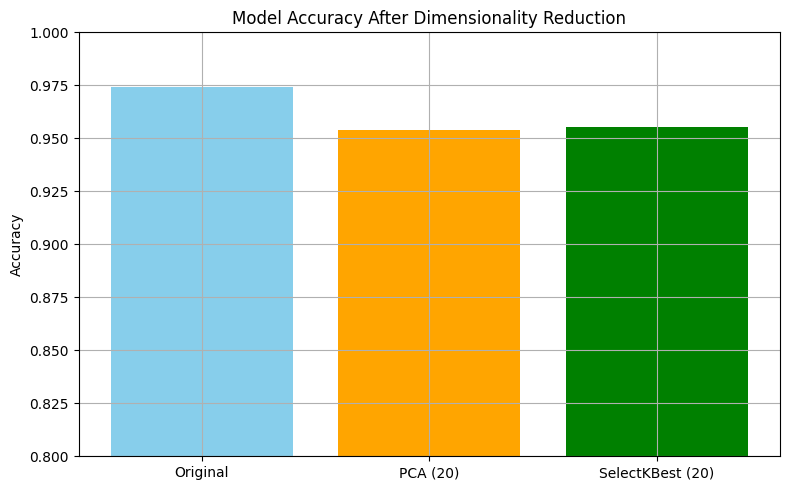

In [10]:
# Plot Accuracy Comparison
methods = ['Original', 'PCA (20)', 'SelectKBest (20)']
accuracies = [original_acc, pca_acc, skb_acc]

plt.figure(figsize=(8, 5))
plt.bar(methods, accuracies, color=['skyblue', 'orange', 'green'])
plt.ylim(0.8, 1.0)
plt.title('Model Accuracy After Dimensionality Reduction')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()